# Prediction using Unsupervised Learning

Problem Statement:
    Using the Iris dataset, identify the optimum number of clusters and visualize it

Done by: Shreya A

In [1]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
#Read the dataset into a Pandas dataframe and print the first 5 rows

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Get general information about the data and check for any missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Text(0, 0.5, 'WCSS')

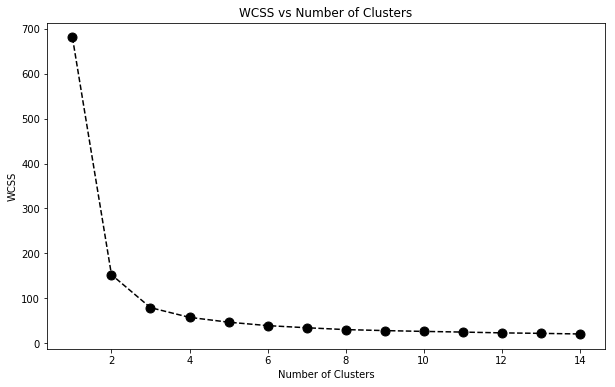

In [4]:
#Using the Elbow Method, visualize the Within Cluster Sum of Squares (WCSS)
#The point after which there is not a dramatc decrease in the WCSS value is the optimal one

x = df.iloc[:, [1, 2, 3, 4]].values
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15), wcss, color='black', linestyle='dashed', marker='o', markersize=9)
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

As seen in the graph above, the optimum number of clusters is 3. This is because after this point, there is not a significant/ dramatic decrease in the WCSS value.

In [5]:
#Applying the optimal clusters to the model

k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_val = k_means.fit_predict(x)

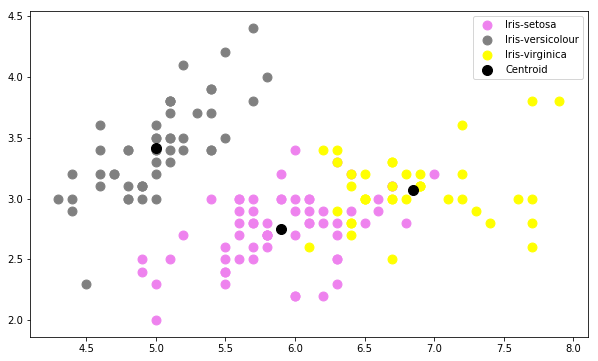

In [6]:
#Visualizing the clusters on Sepal Length and Width

plt.figure(figsize=(10,6))
plt.scatter(x[y_val == 0, 0], x[y_val == 0, 1], s = 80, c = 'violet', label = 'Iris-setosa')
plt.scatter(x[y_val == 1, 0], x[y_val == 1, 1], s = 80, c = 'grey', label = 'Iris-versicolour')
plt.scatter(x[y_val == 2, 0], x[y_val == 2, 1], s = 80, c = 'yellow', label = 'Iris-virginica')

#Plotting the centroid of each clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid')

#Printing the legend onto the visualization
plt.legend()

The clusters are now plotted along with their centroids.